In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
picked = pd.read_csv("result.csv")

In [4]:
picked

,Date,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,Temperature,Humidity,WindSpeed
0,2020-02-01,627639479,5924962522,5924962521,24.905,38.566667,0.869667,4.766667
1,2020-02-01,627639479,5924962522,5924962521,24.843,38.566667,0.869667,4.766667
2,2020-02-01,627639479,5924962522,5924962521,25.362,38.566667,0.869667,4.766667
3,2020-02-01,455778913,42856931,5924962521,22.824,38.566667,0.869667,4.766667
4,2020-02-01,455778913,42856931,5924962521,24.945,38.566667,0.869667,4.766667
...,...,...,...,...,...,...,...,...
26782601,2020-02-29,5701026,464905115,42805266,40.696,31.200000,0.389600,16.600000
26782602,2020-02-29,5670236,42434175,3590689290,16.062,31.200000,0.389600,16.600000
26782603,2020-02-29,5670236,42434175,3590689290,16.198,31.200000,0.389600,16.600000
26782604,2020-02-29,5670236,42434175,3590689290,14.452,31.200000,0.389600,16.600000


In [5]:
picked["osm_end_node_id"].value_counts()

42778520      3191
42844306      3148
42468587      3070
42815983      3013
42431257      2823
              ... 
42956317         1
6291834699       1
42852221         1
42924499         1
5436369702       1
Name: osm_end_node_id, Length: 57043, dtype: int64

42778520

In [6]:
isPlace = picked["osm_end_node_id"] == 42778520
restruc = picked[isPlace]

In [7]:
restruc

,Date,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,Temperature,Humidity,WindSpeed
511259,2020-02-01,420895452,5335109935,42778520,17.276,38.566667,0.869667,4.766667
511260,2020-02-01,420895452,5335109935,42778520,14.639,38.566667,0.869667,4.766667
511261,2020-02-01,420895452,5335109935,42778520,13.210,38.566667,0.869667,4.766667
511262,2020-02-01,420895452,5335109935,42778520,13.213,38.566667,0.869667,4.766667
511263,2020-02-01,420895452,5335109935,42778520,14.485,38.566667,0.869667,4.766667
...,...,...,...,...,...,...,...,...
26452458,2020-02-29,223883749,5335109939,42778520,4.174,31.200000,0.389600,16.600000
26452459,2020-02-29,223883749,5335109939,42778520,7.550,31.200000,0.389600,16.600000
26452460,2020-02-29,223883749,5335109939,42778520,10.028,31.200000,0.389600,16.600000
26452461,2020-02-29,223883749,5335109939,42778520,4.670,31.200000,0.389600,16.600000


In [8]:
reb = restruc.drop(["osm_way_id", "osm_start_node_id", "osm_end_node_id"], axis = 1)

In [9]:
reb

,Date,speed_mph_mean,Temperature,Humidity,WindSpeed
511259,2020-02-01,17.276,38.566667,0.869667,4.766667
511260,2020-02-01,14.639,38.566667,0.869667,4.766667
511261,2020-02-01,13.210,38.566667,0.869667,4.766667
511262,2020-02-01,13.213,38.566667,0.869667,4.766667
511263,2020-02-01,14.485,38.566667,0.869667,4.766667
...,...,...,...,...,...
26452458,2020-02-29,4.174,31.200000,0.389600,16.600000
26452459,2020-02-29,7.550,31.200000,0.389600,16.600000
26452460,2020-02-29,10.028,31.200000,0.389600,16.600000
26452461,2020-02-29,4.670,31.200000,0.389600,16.600000


In [24]:
from matplotlib import pyplot

In [11]:
bal = reb
reb = reb.set_index("Date")

In [12]:
bam = reb.drop(["Temperature", "Humidity", "WindSpeed"], axis = 1)

/anaconda3/envs/ML/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

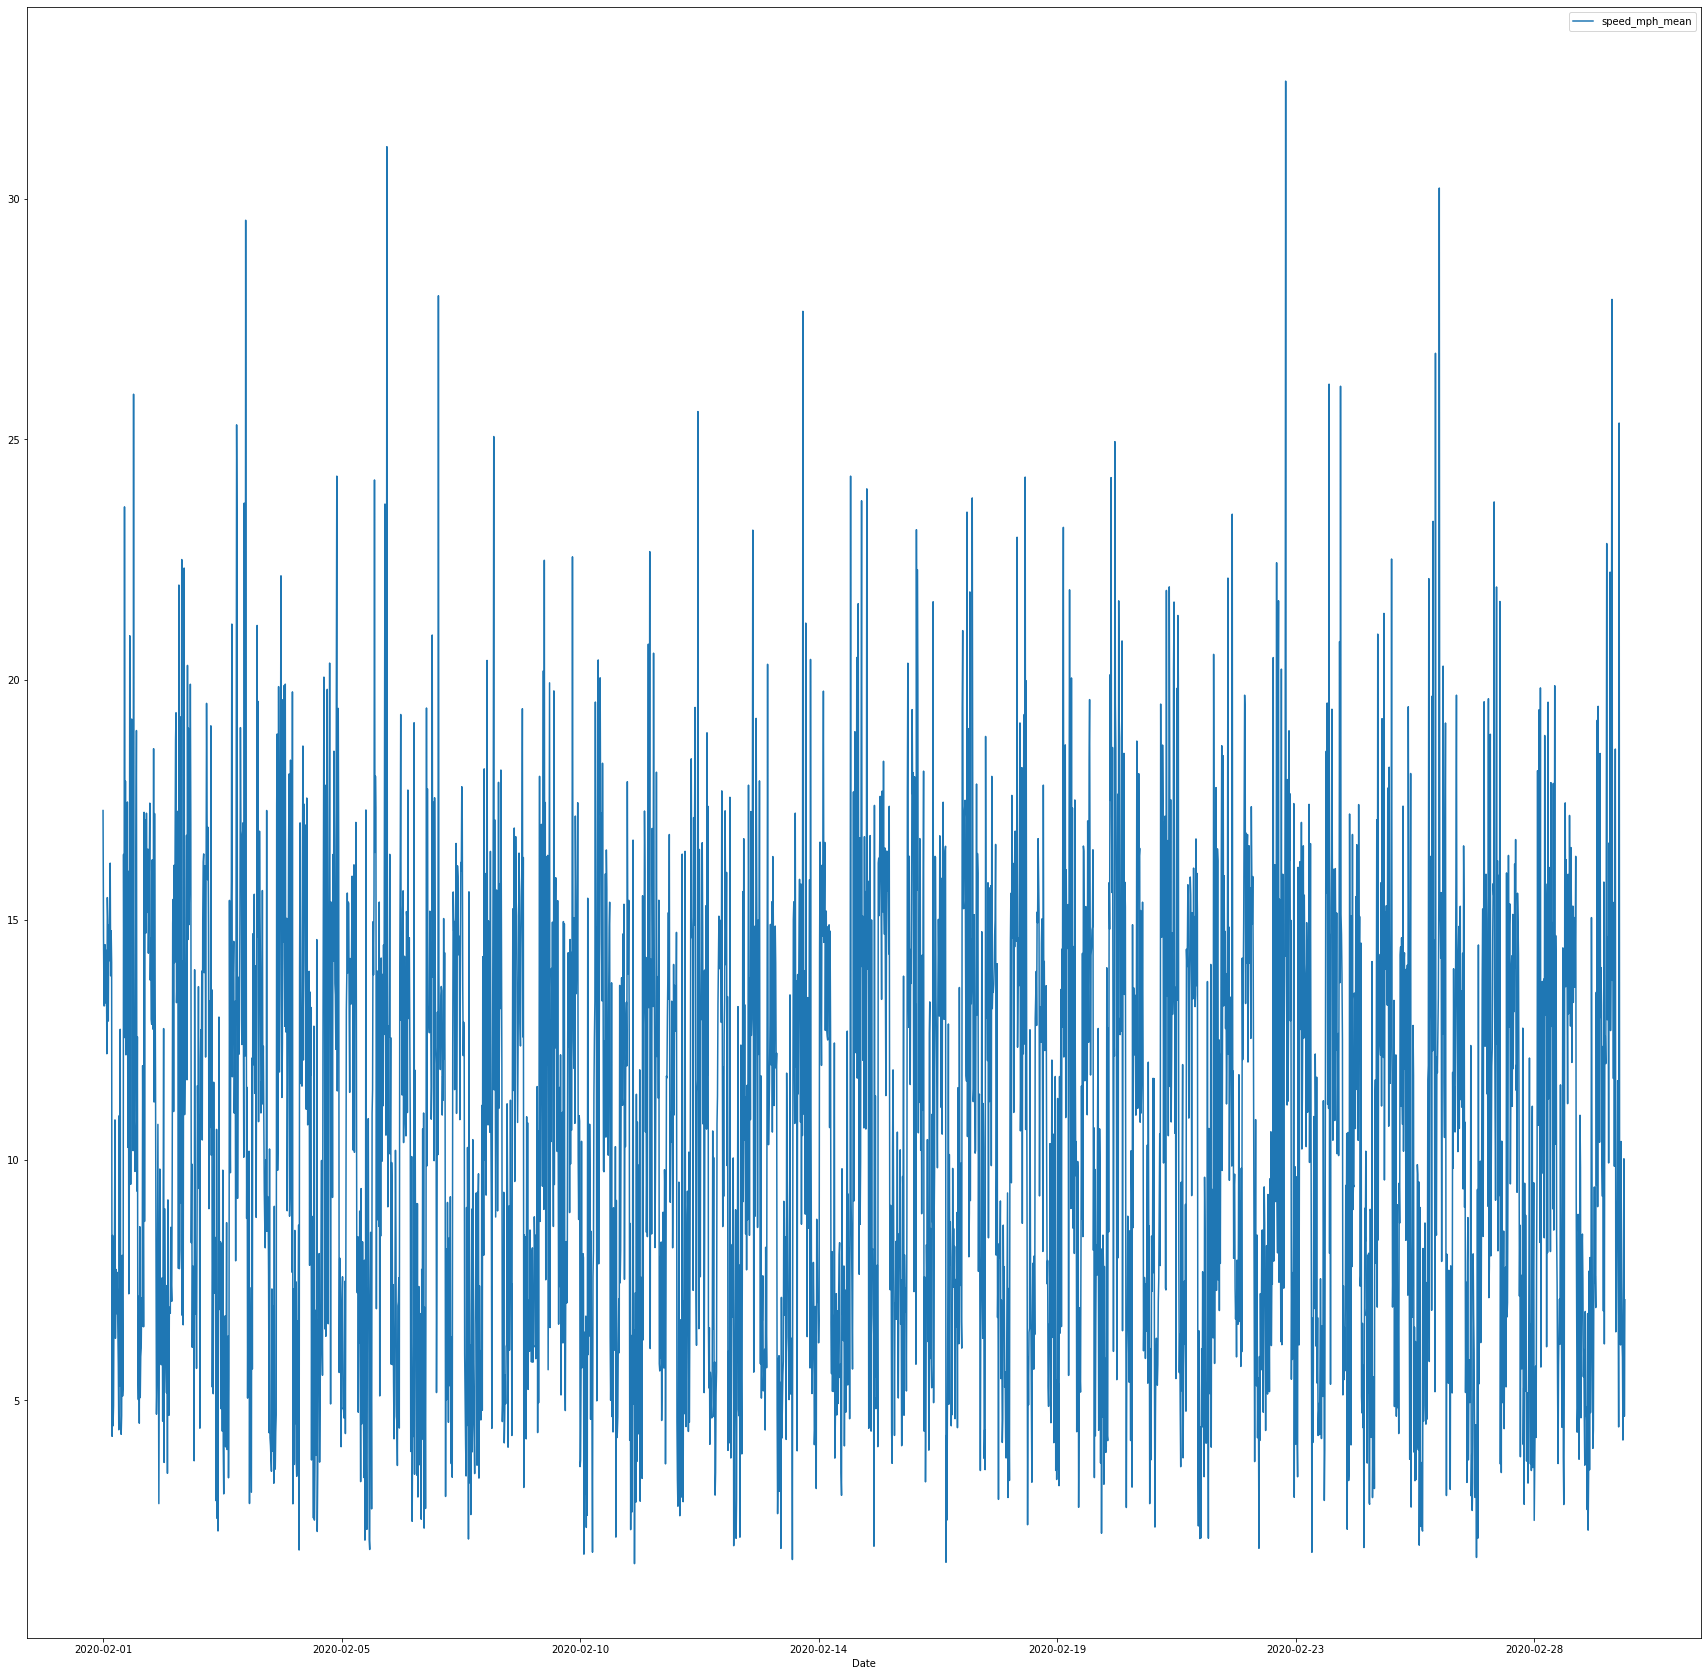

In [13]:
bam.plot(figsize = (30,30))

In [14]:
bam = reb.drop(["speed_mph_mean", "Humidity", "WindSpeed"], axis = 1)

/anaconda3/envs/ML/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

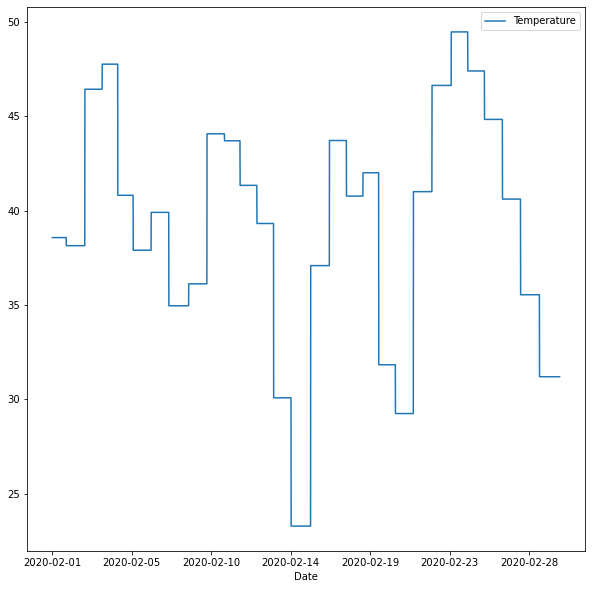

In [15]:
bam.plot(figsize = (10,10))

In [16]:
bam = reb.drop(["speed_mph_mean", "Temperature", "WindSpeed"], axis = 1)

/anaconda3/envs/ML/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

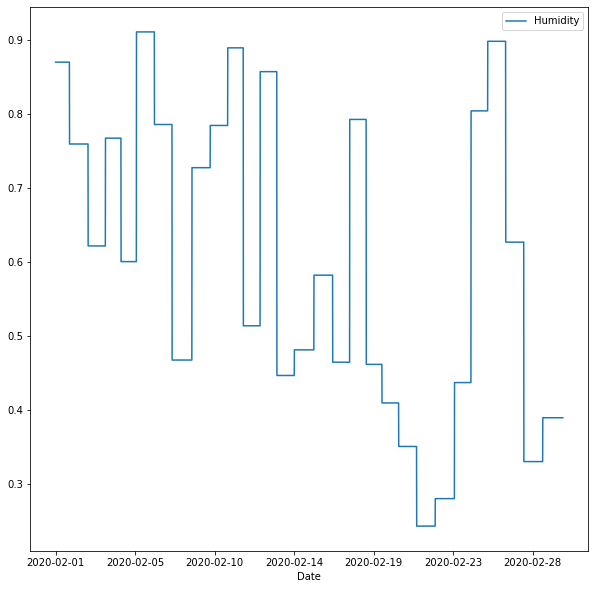

In [17]:
bam.plot(figsize = (10,10))

In [18]:
bam = reb.drop(["speed_mph_mean", "Temperature", "Humidity"], axis = 1)

/anaconda3/envs/ML/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

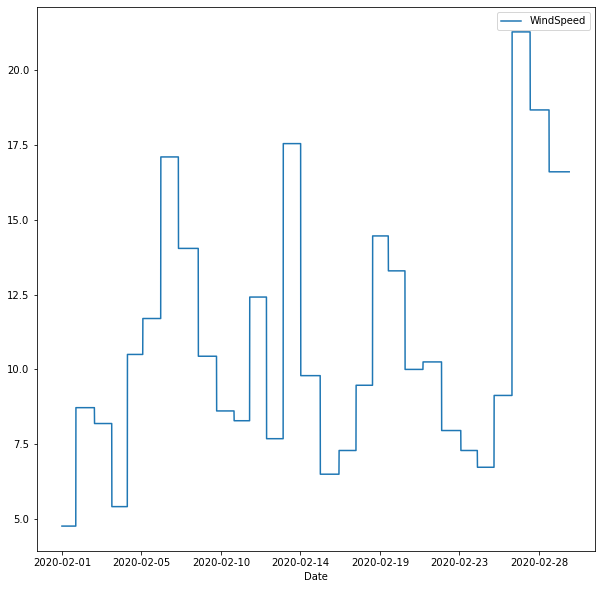

In [19]:
bam.plot(figsize = (10,10))

In [20]:
bal

,Date,speed_mph_mean,Temperature,Humidity,WindSpeed
511259,2020-02-01,17.276,38.566667,0.869667,4.766667
511260,2020-02-01,14.639,38.566667,0.869667,4.766667
511261,2020-02-01,13.210,38.566667,0.869667,4.766667
511262,2020-02-01,13.213,38.566667,0.869667,4.766667
511263,2020-02-01,14.485,38.566667,0.869667,4.766667
...,...,...,...,...,...
26452458,2020-02-29,4.174,31.200000,0.389600,16.600000
26452459,2020-02-29,7.550,31.200000,0.389600,16.600000
26452460,2020-02-29,10.028,31.200000,0.389600,16.600000
26452461,2020-02-29,4.670,31.200000,0.389600,16.600000


In [28]:
bal = bal.rename(columns = {"Date" : "ds", "speed_mph_mean" : "y"})
bal

,ds,y,Temperature,Humidity,WindSpeed
511259,2020-02-01,17.276,38.566667,0.869667,4.766667
511260,2020-02-01,14.639,38.566667,0.869667,4.766667
511261,2020-02-01,13.210,38.566667,0.869667,4.766667
511262,2020-02-01,13.213,38.566667,0.869667,4.766667
511263,2020-02-01,14.485,38.566667,0.869667,4.766667
...,...,...,...,...,...
26452458,2020-02-29,4.174,31.200000,0.389600,16.600000
26452459,2020-02-29,7.550,31.200000,0.389600,16.600000
26452460,2020-02-29,10.028,31.200000,0.389600,16.600000
26452461,2020-02-29,4.670,31.200000,0.389600,16.600000


In [29]:
import fbprophet

In [30]:
from fbprophet import Prophet

In [57]:
train_test = np.array_split(bal, 2)
train = train_test[0]
train

,ds,y,Temperature,Humidity,WindSpeed
511259,2020-02-01,17.276,38.566667,0.869667,4.766667
511260,2020-02-01,14.639,38.566667,0.869667,4.766667
511261,2020-02-01,13.210,38.566667,0.869667,4.766667
511262,2020-02-01,13.213,38.566667,0.869667,4.766667
511263,2020-02-01,14.485,38.566667,0.869667,4.766667
...,...,...,...,...,...
13377927,2020-02-15,14.029,23.291667,0.481250,9.791667
13377928,2020-02-15,15.083,23.291667,0.481250,9.791667
13377929,2020-02-15,12.076,23.291667,0.481250,9.791667
13377930,2020-02-15,14.775,23.291667,0.481250,9.791667


In [58]:
model = Prophet()

In [59]:
model = model.add_regressor('Temperature')
model = model.add_regressor('Humidity')
model = model.add_regressor('WindSpeed')

In [60]:
g = model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
test = train_test[1]
test_vars = test.drop("y", axis = 1)

In [62]:
forecast = model.predict(test_vars)

In [63]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Humidity,Humidity_lower,Humidity_upper,Temperature,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-15,10.083595,4.295874,16.741937,10.083595,10.083595,0.059886,0.059886,0.059886,0.664775,...,0.792645,0.792645,0.792645,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,10.645253
1,2020-02-15,10.083595,4.198612,16.739175,10.083595,10.083595,0.059886,0.059886,0.059886,0.664775,...,0.792645,0.792645,0.792645,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,10.645253
2,2020-02-15,10.083595,4.399212,17.058315,10.083595,10.083595,0.059886,0.059886,0.059886,0.664775,...,0.792645,0.792645,0.792645,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,10.645253
3,2020-02-15,10.083595,4.742941,16.445900,10.083595,10.083595,0.059886,0.059886,0.059886,0.664775,...,0.792645,0.792645,0.792645,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,10.645253
4,2020-02-15,10.083595,4.377291,16.888941,10.083595,10.083595,0.059886,0.059886,0.059886,0.664775,...,0.792645,0.792645,0.792645,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,10.645253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,2020-02-29,8.937456,2.280995,14.382195,8.937408,8.937506,0.085442,0.085442,0.085442,0.325804,...,-0.155957,-0.155957,-0.155957,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,8.550512
1591,2020-02-29,8.937456,2.383980,14.508588,8.937408,8.937506,0.085442,0.085442,0.085442,0.325804,...,-0.155957,-0.155957,-0.155957,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,8.550512
1592,2020-02-29,8.937456,2.613665,14.705977,8.937408,8.937506,0.085442,0.085442,0.085442,0.325804,...,-0.155957,-0.155957,-0.155957,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,8.550512
1593,2020-02-29,8.937456,1.728558,14.710683,8.937408,8.937506,0.085442,0.085442,0.085442,0.325804,...,-0.155957,-0.155957,-0.155957,-0.230987,-0.230987,-0.230987,0.0,0.0,0.0,8.550512


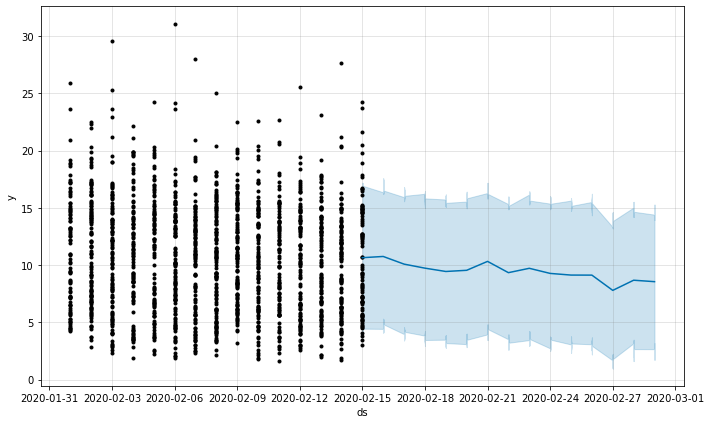

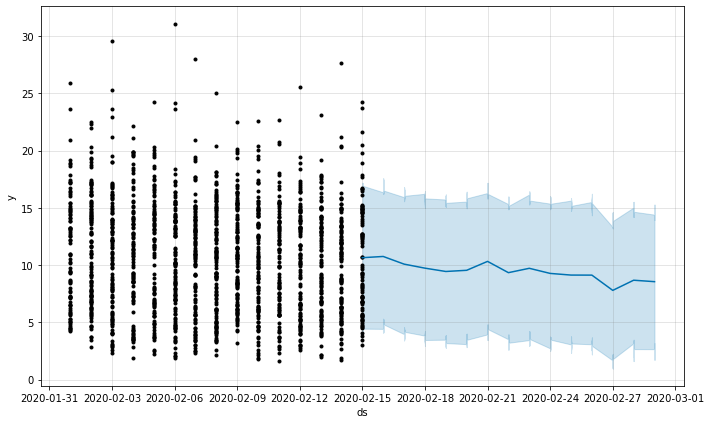

In [64]:
model.plot(forecast)

In [103]:
df_cv = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
df_cv = pd.concat([df_cv, test["y"].reset_index()], axis = 1)
df_cv.drop("index", axis = 1, inplace = True)
df_cv = df_cv.groupby("ds").mean()
df_cv = df_cv.reset_index()
df_cv["cutoff"] = pd.Timestamp("2020-02-15")
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-15,10.645253,4.483849,16.780749,10.127448,2020-02-15
1,2020-02-16,10.751911,4.630506,16.881023,11.376186,2020-02-15
2,2020-02-17,10.082749,3.961261,16.195491,11.349065,2020-02-15
3,2020-02-18,9.730842,3.596070,15.857702,11.111625,2020-02-15
4,2020-02-19,9.440149,3.345777,15.564212,10.943667,2020-02-15
5,2020-02-20,9.543278,3.435190,15.686737,11.460533,2020-02-15
6,2020-02-21,10.322238,4.191686,16.486994,11.063593,2020-02-15
7,2020-02-22,9.336743,3.185699,15.477112,10.572051,2020-02-15
8,2020-02-23,9.717925,3.608567,15.837735,11.006719,2020-02-15
9,2020-02-24,9.270888,3.153930,15.422660,10.982788,2020-02-15


In [104]:
fbprophet.diagnostics.performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days,0.268122,0.517805,0.517805,0.051129,0.051129,1.0
1,1 days,0.389720,0.624276,0.624276,0.054876,0.054876,1.0
2,2 days,1.603558,1.266317,1.266317,0.111579,0.111579,1.0
3,3 days,1.906562,1.380783,1.380783,0.124265,0.124265,1.0
4,4 days,2.260566,1.503518,1.503518,0.137387,0.137387,1.0
5,5 days,3.675867,1.917255,1.917255,0.167292,0.167292,1.0
6,6 days,0.549607,0.741355,0.741355,0.067009,0.067009,1.0
7,7 days,1.525986,1.235308,1.235308,0.116847,0.116847,1.0
8,8 days,1.660989,1.288794,1.288794,0.117092,0.117092,1.0
9,9 days,2.930602,1.711900,1.711900,0.155871,0.155871,1.0
